In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn 

In [2]:
df = pd.read_csv("./triage.csv")

In [12]:

df['Systolic BP'] = pd.to_numeric(df['Systolic BP'], errors='coerce')
df['Diastolic BP'] = pd.to_numeric(df['Diastolic BP'], errors='coerce')
df['Heart Rate'] = pd.to_numeric(df['Heart Rate'], errors='coerce')
df['Respiratory Rate'] = pd.to_numeric(df['Respiratory Rate'], errors='coerce')
df['Body Temperature'] = pd.to_numeric(df['Body Temperature'], errors='coerce')

In [13]:
# Impute missing values with the median (more robust to outliers)
df['Systolic BP'].fillna(df['Systolic BP'].median(), inplace=True)
df['Diastolic BP'].fillna(df['Diastolic BP'].median(), inplace=True)
df['Heart Rate'].fillna(df['Heart Rate'].median(), inplace=True)
df['Respiratory Rate'].fillna(df['Respiratory Rate'].median(), inplace=True)
df['Body Temperature'].fillna(df['Body Temperature'].median(), inplace=True)


In [17]:
df['status'].unique()

array(['overtriage', 'correct', 'undertriage'], dtype=object)

In [ ]:
df['status_numeric'] = df['status'].map({'overtriage': 0, 'correct': 1, 'undertriage': 2})

In [20]:
from sklearn.ensemble import RandomForestClassifier
numericColumns = ['Systolic BP','Diastolic BP','Heart Rate' ,'Respiratory Rate', 'Body Temperature', 'KTAS duration_min','Length of stay_min']

X = df[numericColumns]  
y = df['status']  # Target: 'status' (overtriage, correct, undertriage)

model = RandomForestClassifier(random_state=42)
model.fit(X, y)
 
importance = model.feature_importances_
print(importance)


[0.12982749 0.12470094 0.17672253 0.03595052 0.13770236 0.14292048
 0.25217568]


                    Systolic BP  Diastolic BP  Heart Rate  Respiratory Rate  \
Systolic BP            1.000000      0.760940    0.058985         -0.121298   
Diastolic BP           0.760940      1.000000    0.091299         -0.041835   
Heart Rate             0.058985      0.091299    1.000000          0.122906   
Respiratory Rate      -0.121298     -0.041835    0.122906          1.000000   
Body Temperature       0.087243      0.009723    0.250408          0.036075   
KTAS duration_min      0.180200      0.060277    0.072146         -0.214111   
Length of stay_min    -0.045161     -0.015565   -0.020007          0.055998   

                    Body Temperature  KTAS duration_min  Length of stay_min  
Systolic BP                 0.087243           0.180200           -0.045161  
Diastolic BP                0.009723           0.060277           -0.015565  
Heart Rate                  0.250408           0.072146           -0.020007  
Respiratory Rate            0.036075          -0.214111

<Axes: >

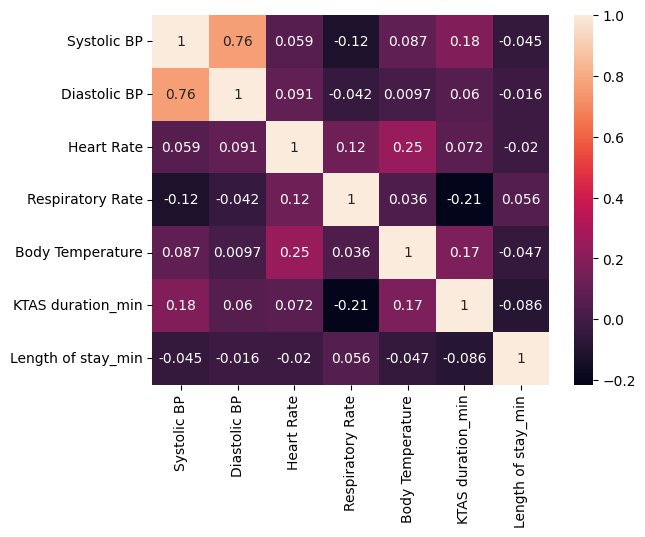

In [15]:
correlationMatrix  = df.loc[:,numericColumns].corr() 
print(correlationMatrix) 
seaborn.heatmap(correlationMatrix, annot=True)